<a href="https://colab.research.google.com/github/akipi-ro/open_cv/blob/main/%E8%AC%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import cv2
import numpy as np
from IPython.display import Image, display

import cv2
import matplotlib.pyplot as plt
import os.path

def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

def adjust(img, alpha=1.8, beta=0.0):
    # 積和演算を行う。
    dst = alpha * img + beta
    # [0, 255] でクリップし、uint8 型にする。
    return np.clip(dst, 0, 255).astype(np.uint8)


# 画像を読み込む。
src = cv2.imread("148916.jpg")

# コントラスト、明るさを変更する。
dst = adjust(src, alpha=1.0, beta=20.0)
imshow(dst)

/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'numpy.ndarray'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

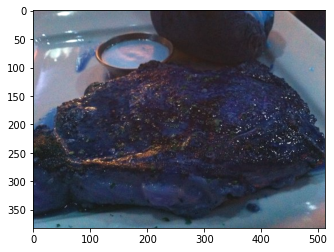

In [32]:
plt.imshow(dst)

In [24]:
import cv2
from IPython.display import Image, display
from ipywidgets import widgets


def imshow(img):
    """画像を Notebook 上に表示する。
    """
    encoded = cv2.imencode(".png", img)[1]
    display(Image(encoded, width=400))


def process(img, alpha, beta):
    """明るさ、コントラストを調整し、結果を表示する。
    """
    dst = adjust(img, alpha, beta)
    imshow(dst)


param_widgets = {}

# パラメータ「ゲイン」を設定するスライダー
param_widgets["alpha"] = widgets.FloatSlider(
    min=0.0, max=3.0, step=0.1, value=1.0, description="alpha: "
)

# パラメータ「バイアス」を設定するスライダー
param_widgets["beta"] = widgets.FloatSlider(
    min=-100.0, max=100.0, step=10.0, value=0.0, description="beta: "
)

for x in param_widgets.values():
    x.layout.width = "400px"

# 画像を読み込む。
img = cv2.imread("148916.jpg")

# ウィジェットを表示する。
widgets.interactive(process, img=widgets.fixed(img), **param_widgets)


interactive(children=(FloatSlider(value=1.0, description='alpha: ', layout=Layout(width='400px'), max=3.0), Fl…